# Capstone Project Apprenticeship

Name: Dámaris Flores Albores  
Date: April 2023

## The Steps

1.- For this project I will start by evaluating the business needs and determine our key questions from which I will start the data exploration an analysis.(*Business Understanding*)

2.- After that I will do a first data exploration of the dataset and determined (based on actual resources and timeline) the features to work with. (*Data Understanding*)

3.- The next step will be cleaning the dataset: look for null data, renaming columns and changing the type of certain columns for analysis purposes. (*Data Preparation*)

4.- More data exploration. I will decode de dataset and look for inconsistencies and some first descriptive statistics to have a better understanding of the data.

5.- I will start with a vanilla regression model as a starting point.(*Modeling*)

6.- I will try with a classification model. For that I will have to create a new column with the categories implemented.

7.- It's to tune the model by trying different approaches. (*Evaluation*)

8.- Explore further approaches. Sugestion of next steps for a deeper analysis. 

### Let's start!



# Business Understanding

In order to understand the mexican context and design better public policies, the ENOE (National Survey of Occupation and Employment) collects information from the population. However, 30% of the people who are surveyed do not answer how much they earn.  
The purpose of this project is to make accurate income predictions based on the known data. The income predictor helps by filling in the missing data for better social analytics purposes. 

It also gives us the opportunity to highlight the inequalities and to analize how much does some feautures are factors into determining income.  




# Data Understanding 

First a preliminary data exploration of our dataset for better understanding.

In [1]:
# Start by importing all the libraries we will be using

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3
from scipy import stats 
import math
import statsmodels.api as sm

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [2]:
# Starting with reading actual dataset and its dictionary

enoe = pd.read_csv('Data/conjunto_de_datos_sdem_enoen_2022_4t.csv', encoding='latin')
dictionary = pd.read_csv('Data/diccionario_datos_sdem_enoen_2022_4t.csv', encoding='latin')

# Understanding dictionary csv (the first five entries)

dictionary.head()

C:\Users\dfloresalbores\Anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (2,5,8,22,23,24,25,26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,NOMBRE_CAMPO,LONGITUD,TIPO,NEMÓNICO,CATÁLOGO,RANGO_CLAVES
0,Resultado definitivo de la entrevista,2,C,r_def,r_def,"00,15 ..."
1,Número de la localidad,4,C,loc,loc,0001-9998
2,Número de municipio según entidad,3,C,mun,mun,001-575
3,Estrato nacional y estatal,2,C,est,NaN,"Primer dígito 1-4, Segundo dígito 0-4"
4,Estrato de diseño trimestral,4,C,est_d_tri,NaN,0001-9999


In [3]:
# Understanding enoe csv
# Number of entries, columns and types

enoe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396629 entries, 0 to 396628
Columns: 114 entries, r_def to mes_cal
dtypes: float64(1), int64(82), object(31)
memory usage: 345.0+ MB


In [4]:
#The first five entries

enoe.head()

,r_def,loc,mun,est,est_d_tri,est_d_men,ageb,t_loc_tri,t_loc_men,cd_a,...,scian,t_tra,emp_ppal,tue_ppal,trans_ppal,mh_fil2,mh_col,sec_ins,tipo,mes_cal
0,0,,2,10,122,,0,1,,1,...,12,1,2,2,0,3,2,2,1,99
1,0,,2,10,122,,0,1,,1,...,0,1,0,0,0,0,0,0,1,99
2,0,,2,10,122,,0,1,,1,...,12,1,2,2,0,3,2,2,1,99
3,0,,2,10,122,,0,1,,1,...,0,1,0,0,0,0,0,0,1,99
4,0,,2,10,122,,0,1,,1,...,14,1,2,2,0,3,2,2,1,99


### Conclusion of first exploration of data

After the first exploration we can find the enoe database is huge and with way too much information, given the timeline I will choose a maximum of 15 columns to work with and strip the rest. 
For that I will need to understand what does each column means and how much valuable information i can get with them.

In [5]:
with pd.option_context('display.max_rows', None,):
   print(dictionary['NOMBRE_CAMPO'])

0                  Resultado definitivo de la entrevista
1                                 Número de la localidad
2                      Número de municipio según entidad
3                             Estrato nacional y estatal
4                           Estrato de diseño trimestral
5                              Estrato de diseño mensual
6                      Número de ageb del marco nacional
7                         Tamaño de localidad trimestral
8                            Tamaño de localidad mensual
9                               Ciudad autorrepresentada
10                                               Entidad
11                                               Control
12                           Unidad primaria de muestreo
13                                  Distribución semanal
14                      Número progresivo de la vivienda
15                                 Vivienda seleccionada
16                                       Número de hogar
17                             

By looking at the data dictionary, I decide to explore further Columns 10, 23, 24, 29, 36, 37, 49, 50, 54, 57, 59, 61, 94, 96
before deciding which ones I want to use. For that I will need to know the codification of each of them (this information is in additionals csv's for each column)

In [6]:
new_dict = dictionary.iloc[[10, 23, 24, 29, 30, 32, 36, 37, 49, 50, 54, 57, 59, 61, 94, 96]]
new_dict

,NOMBRE_CAMPO,LONGITUD,TIPO,NEMÓNICO,CATÁLOGO,RANGO_CLAVES
10,Entidad,2,C,ent,ent,[01-32]
23,Pregunta 8 Sexo,1,C,sex,sex,"1,2"
24,Pregunta 9 Edad,2,C,eda,eda,00-99
29,Pregunta 12 ¿Sabe leer y escribir un recado...?,1,C,cs_p12,cs_p12,"1-2,9"
30,Pregunta 13 ¿Hasta qué año aprobó... en la esc...,2,C,cs_p13_1,cs_p13_1,"00-09,99"
32,Pregunta 14 Clave de la carrera,6,C,cs_p14_c,cs_p14_c,Catálogo CMPE (carreras)
36,Pregunta 18 En total cuántas hijas e hijos que...,2,C,n_hij,NaN,"00-25,99"
37,Pregunta 19 Estado conyugal,1,C,e_con,e_con,"1-6,9"
49,Urbano/Rural,1,N,ur,ur,[1-2]
50,Zona salarial,1,N,zona,zona,[1-2]


In [7]:
#Let's give a look to those files, the name of the files is on our dictionary column called "CATÁLOGO"

entity_c = pd.read_csv('Data/ent.csv', encoding='latin')
sex_c = pd.read_csv('Data/sex.csv', encoding='latin')
age_c = pd.read_csv('Data/eda.csv', encoding='latin')
literacy_c = pd.read_csv('Data/cs_p12.csv', encoding='latin')
scholarship_c = pd.read_csv('Data/cs_p13_1.csv', encoding='latin')
career_c = pd.read_csv('Data/cs_p14_c.csv', encoding='latin')
maritalstatus_c = pd.read_csv('Data/e_con.csv', encoding='latin')
urban_c = pd.read_csv('Data/ur.csv', encoding='latin')
zone_c = pd.read_csv('Data/zona.csv', encoding='latin')
ocupy_pos_c = pd.read_csv('Data/pos_ocu.csv', encoding='latin')
sector_c = pd.read_csv('Data/rama.csv', encoding='latin')
incomelevel_c = pd.read_csv('Data/ing7c.csv', encoding='latin')
yearsstudy_c = pd.read_csv('Data/anios_esc.csv', encoding='latin')
pea_c = pd.read_csv('Data/clase1.csv', encoding= 'latin')

# We will look just a few of them
#Gender
print('')
print(new_dict['NOMBRE_CAMPO'][23])
print(sex_c)

#Knows to read and write?
print('')
print(new_dict['NOMBRE_CAMPO'][29])
print(literacy_c)

#Scholarship?
print('')
print(new_dict['NOMBRE_CAMPO'][30])
print(scholarship_c)


Pregunta 8 Sexo
   CVE DESCRIP
0    1  Hombre
1    2   Mujer

Pregunta 12 ¿Sabe leer y escribir un recado...?
   CVE  DESCRIP
0    1       Sí
1    2       No
2    9  No sabe

Pregunta 13 ¿Hasta qué año aprobó... en la escuela?
    CVE                      DESCRIP
0     0                      Ninguno
1     1                   Preescolar
2     2                     Primaria
3     3                   Secundaria
4     4  Preparatoria o bachillerato
5     5                       Normal
6     6              Carrera técnica
7     7                  Profesional
8     8                     Maestría
9     9                    Doctorado
10   99                      No sabe


Now that I have a better understanding of the data I will proceed to select my columns from enoe csv and change the column names. 

In [8]:
# Here are the names of the columns

new_dict['NEMÓNICO']

10          ent
23          sex
24          eda
29       cs_p12
30     cs_p13_1
32     cs_p14_c
36        n_hij
37        e_con
49           ur
50         zona
54       clase1
57      pos_ocu
59         rama
61        ing7c
94    anios_esc
96      ingocup
Name: NEMÓNICO, dtype: object

In [9]:
#Selecting the columns by their names and preview

df = enoe[['ent', 'sex', 'eda', 'cs_p12','cs_p13_1', 'cs_p14_c','n_hij','e_con','ur', 'zona', 'clase1','pos_ocu', 'rama', 'ing7c', 'anios_esc', 'ingocup', 'ing_x_hrs']]
df.head(5)

,ent,sex,eda,cs_p12,cs_p13_1,cs_p14_c,n_hij,e_con,ur,zona,clase1,pos_ocu,rama,ing7c,anios_esc,ingocup,ing_x_hrs
0,9,1,59,1,7,51100,,6,1,2,1,1,4,7,16,0,0.0000
1,9,2,31,1,7,33200,0,6,1,2,2,0,0,0,16,0,0.0000
2,9,1,30,1,7,61000,,6,1,2,1,1,4,4,16,16000,74.4186
3,9,1,15,1,3,,,6,1,2,2,0,0,0,8,0,0.0000
4,9,1,42,1,7,62100,,2,1,2,1,1,4,7,16,0,0.0000


In [10]:
#Renaming our columns for better understanding

df.rename(columns = {'ent': 'Residence', 'sex': 'Gender', 'eda': 'Age', 'cs_p12': 'Literacy', 'cs_p13_1': 'Scholarship', 'cs_p14_c': 'Career','n_hij': 'Num Children','e_con': 'Marital Status','ur':'Urban or Rural', 'zona': 'Economic Zone', 'clase1':'Un/Employed','pos_ocu':'By Position', 'rama':'By Economic Sector', 'ing7c':'By Income Level', 'anios_esc': 'Years of Study', 'ingocup':'Monthly Income', 'ing_x_hrs':'Income by hour' }, inplace = True)
df.head(3)

C:\Users\dfloresalbores\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,Un/Employed,By Position,By Economic Sector,By Income Level,Years of Study,Monthly Income,Income by hour
0,9,1,59,1,7,51100,,6,1,2,1,1,4,7,16,0,0.0000
1,9,2,31,1,7,33200,0,6,1,2,2,0,0,0,16,0,0.0000
2,9,1,30,1,7,61000,,6,1,2,1,1,4,4,16,16000,74.4186


In [11]:
# As we are interested in just the employed population, we will delete all the entries for unemployed and no aplicable 
# and we can drop the employed column. Is not necessary anymore.

df.drop(df[df['Un/Employed'] == 0].index, inplace=True)

df.drop(df[df['Un/Employed'] == 2].index, inplace=True)

employed_df = df.drop('Un/Employed',1)

employed_df

C:\Users\dfloresalbores\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\dfloresalbores\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,By Income Level,Years of Study,Monthly Income,Income by hour
0,9,1,59,1,7,51100,,6,1,2,1,4,7,16,0,0.00000
2,9,1,30,1,7,61000,,6,1,2,1,4,4,16,16000,74.41860
4,9,1,42,1,7,62100,,2,1,2,1,4,7,16,0,0.00000
5,9,2,36,1,7,101500,1,5,1,2,1,4,7,16,0,0.00000
6,9,1,43,1,7,101600,,5,1,2,1,4,7,16,0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389425,32,1,62,1,2,,,5,2,2,1,1,2,6,7740,36.00000
389428,32,2,31,1,4,,0,4,2,2,1,4,2,12,7740,37.50000
389429,32,2,18,1,4,,0,6,2,2,1,3,2,12,7955,30.83333
389430,32,1,54,1,2,,,5,2,2,3,4,7,2,0,0.00000


In [12]:
#we search for nulls due to we can see in the preview that some colmns has no data

employed_df.isnull().sum(axis = 0)


Residence             0
Gender                0
Age                   0
Literacy              0
Scholarship           0
Career                0
Num Children          0
Marital Status        0
Urban or Rural        0
Economic Zone         0
By Position           0
By Economic Sector    0
By Income Level       0
Years of Study        0
Monthly Income        0
Income by hour        0
dtype: int64

In [13]:
#As we know theres some blanks in our dataframe, we will review our data type

employed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186120 entries, 0 to 389432
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Residence           186120 non-null  int64  
 1   Gender              186120 non-null  object 
 2   Age                 186120 non-null  object 
 3   Literacy            186120 non-null  object 
 4   Scholarship         186120 non-null  object 
 5   Career              186120 non-null  object 
 6   Num Children        186120 non-null  object 
 7   Marital Status      186120 non-null  object 
 8   Urban or Rural      186120 non-null  int64  
 9   Economic Zone       186120 non-null  int64  
 10  By Position         186120 non-null  int64  
 11  By Economic Sector  186120 non-null  int64  
 12  By Income Level     186120 non-null  int64  
 13  Years of Study      186120 non-null  int64  
 14  Monthly Income      186120 non-null  int64  
 15  Income by hour      186120 non-nul

# Data Preparation

Based on what we know we will start cleaning and preparing our data for modeling

In [14]:
#Most likely there are spaces instead of nulls, so we are removing the spaces from all our object data

employed_df['Gender'] = employed_df['Gender'].replace(' ', '', regex=True)
employed_df['Num Children'] = employed_df['Num Children'].replace(' ', '', regex=True)
employed_df['Age'] = employed_df['Age'].replace(' ', '', regex=True)
employed_df['Literacy'] = employed_df['Literacy'].replace(' ', '', regex=True)
employed_df['Marital Status'] = employed_df['Marital Status'].replace(' ', '', regex=True)
employed_df['Scholarship'] = employed_df['Scholarship'].replace(' ', '', regex=True)
employed_df['Career'] = employed_df['Career'].replace(' ', '', regex=True)

#And converting now to numerical data

employed_df['Gender'] = pd.to_numeric(employed_df['Gender'])
employed_df['Num Children'] = pd.to_numeric(employed_df['Num Children'])
employed_df['Age'] = pd.to_numeric(employed_df['Age'])
employed_df['Literacy'] = pd.to_numeric(employed_df['Literacy'])
employed_df['Marital Status'] = pd.to_numeric(employed_df['Marital Status'])
employed_df['Scholarship'] = pd.to_numeric(employed_df['Scholarship'])
employed_df['Career'] = pd.to_numeric(employed_df['Career'])

#Preview
employed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186120 entries, 0 to 389432
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Residence           186120 non-null  int64  
 1   Gender              186120 non-null  int64  
 2   Age                 186120 non-null  int64  
 3   Literacy            186120 non-null  int64  
 4   Scholarship         186120 non-null  int64  
 5   Career              57145 non-null   float64
 6   Num Children        77322 non-null   float64
 7   Marital Status      186120 non-null  int64  
 8   Urban or Rural      186120 non-null  int64  
 9   Economic Zone       186120 non-null  int64  
 10  By Position         186120 non-null  int64  
 11  By Economic Sector  186120 non-null  int64  
 12  By Income Level     186120 non-null  int64  
 13  Years of Study      186120 non-null  int64  
 14  Monthly Income      186120 non-null  int64  
 15  Income by hour      186120 non-nul

In [15]:
#As we can see there is a lot of data unspecified. For that i will go column by column analysing the best way to handled nulls.

# First Age, according to our description 98 handles unespecified age above 12 years old

employed_df[employed_df['Age']==98]

,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,By Income Level,Years of Study,Monthly Income,Income by hour
133,9,1,98,1,3,NaN,NaN,6,1,2,1,4,7,9,0,0.00000
4077,9,2,98,1,4,NaN,1.0,5,1,2,1,4,2,12,9000,46.51163
4078,9,1,98,1,4,NaN,NaN,5,1,2,1,4,2,12,9000,49.83389
7018,9,2,98,1,7,51200.0,0.0,6,1,2,1,4,3,16,12000,55.81395
7021,9,2,98,1,6,101400.0,1.0,6,1,2,1,4,3,12,14000,65.11628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372809,24,1,98,2,0,NaN,NaN,2,2,2,1,6,1,0,3870,18.75000
374153,24,1,98,2,0,NaN,NaN,1,2,2,1,4,7,0,0,0.00000
374155,24,1,98,2,0,NaN,NaN,6,2,2,1,4,7,0,0,0.00000
376432,26,2,98,1,2,NaN,4.0,2,2,2,1,2,2,6,7740,37.50000


In [16]:
#As they are not too many (128 entries) we will just drop them
employed_df = employed_df.drop(employed_df[employed_df['Age']==98].index)

In [17]:
# Literacy, according to our description 9 handles unespecified 
employed_df[employed_df['Literacy']==9]

,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,By Income Level,Years of Study,Monthly Income,Income by hour
83658,30,1,29,9,99,NaN,NaN,1,1,2,1,1,2,99,7740,35.29412
96453,1,2,50,9,99,NaN,99.0,9,1,2,1,4,2,99,0,0.00000
182830,30,1,22,9,99,NaN,NaN,1,1,2,1,4,2,99,7000,0.00000
228625,4,1,57,9,2,NaN,NaN,1,1,2,3,6,1,1,2150,5.95238
257975,12,1,57,9,99,NaN,NaN,5,2,2,3,2,1,99,4300,20.83333
257979,12,2,57,9,99,NaN,3.0,5,2,2,1,4,2,99,6000,28.47651
319552,2,1,40,9,2,NaN,NaN,1,2,1,1,6,1,1,7525,50.00000
364754,20,1,13,9,2,NaN,NaN,6,2,2,1,1,1,5,5160,26.08696
371537,23,1,71,9,0,NaN,NaN,5,2,2,2,6,7,0,0,0.00000
371538,23,2,69,9,0,NaN,7.0,5,2,2,3,2,1,0,1075,25.00000


In [18]:
# as they are not many, we will drop them
employed_df = employed_df.drop(employed_df[employed_df['Literacy']==9].index)

In [19]:
# Marital Status, according to our description 9 handles unespecified 
employed_df[employed_df['Marital Status']==9]

,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,By Income Level,Years of Study,Monthly Income,Income by hour
90281,12,1,19,1,4,NaN,NaN,9,1,2,1,4,1,10,0,0.00000
150577,26,2,57,1,3,NaN,99.0,9,1,2,1,4,2,9,6450,37.50000
170477,4,1,61,1,3,NaN,NaN,9,1,2,3,3,1,9,5160,20.00000
173695,17,2,56,1,3,NaN,3.0,9,1,2,1,4,7,9,0,0.00000
200714,22,1,50,1,7,41100.0,NaN,9,1,2,3,3,7,16,0,0.00000
201367,22,1,41,1,3,NaN,NaN,9,1,2,1,4,4,9,0,0.00000
235600,2,1,26,1,4,NaN,NaN,9,1,1,1,3,1,12,7740,37.50000
293482,26,2,57,1,3,NaN,3.0,9,2,2,1,2,1,9,4300,20.00000
329823,27,1,56,1,3,NaN,NaN,9,2,2,1,4,2,9,6880,33.33333
351006,12,1,45,2,0,NaN,NaN,9,2,2,1,6,2,0,6450,35.71429


In [20]:
# the same
employed_df = employed_df.drop(employed_df[employed_df['Marital Status']==9].index)
employed_df['Marital Status'].value_counts()

5    70041
6    59899
1    36142
2     9728
4     5448
3     4713
Name: Marital Status, dtype: int64

In [21]:
#Urban or Rural has no unspecified
print("Urban or Rural")
print(employed_df['Urban or Rural'].value_counts())

Urban or Rural
1    123966
2     62005
Name: Urban or Rural, dtype: int64


In [22]:
# Economic Zone
print("Economic Zone")
print(employed_df['Economic Zone'].value_counts())

Economic Zone
2    170386
1     15585
Name: Economic Zone, dtype: int64


In [23]:
# With employee by position we need to review unespecified (5) and no applicable (0)
print("Employee by Position")
print(employed_df['By Position'].value_counts())

Employee by Position
1    127128
3     37075
2      9411
4      6926
0      5431
Name: By Position, dtype: int64


Before deciding I will check out the other feautures that are related

In [24]:
# With employee by position we need to review unespecified (5) and no applicable (0)
print("Employee by Economic Sector")
print(employed_df['By Economic Sector'].value_counts())

Employee by Economic Sector
4    83492
3    35420
2    29838
6    14445
1    14364
0     5431
5     1691
7     1290
Name: By Economic Sector, dtype: int64


In [25]:
# We will just drop the inespecified ones and leave the no applicable.

new_employed = employed_df.drop(employed_df[employed_df['By Economic Sector']==7].index)
new_employed['By Economic Sector'].value_counts()

4    83492
3    35420
2    29838
6    14445
1    14364
0     5431
5     1691
Name: By Economic Sector, dtype: int64

In [26]:
# By Income Level, 7- not specified
print("Employee by Income Level")
print(employed_df['By Income Level'].value_counts())

Employee by Income Level
2    62698
1    50442
7    26702
3    20523
4     8690
6     8485
0     5431
5     3000
Name: By Income Level, dtype: int64


In [27]:
# Because there are too many not specified I will drop the entire column
new_employed = new_employed.drop('By Income Level',1)

In [28]:
# Years of Study, according to our description 99 handles unespecified 

new_employed[new_employed['Years of Study']==99]

,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Years of Study,Monthly Income,Income by hour
1399,9,1,25,1,4,NaN,NaN,6,1,2,1,4,99,0,0.00000
3915,9,1,31,1,4,NaN,NaN,6,1,2,1,4,99,0,0.00000
3916,9,2,29,1,4,NaN,0.0,6,1,2,0,0,99,0,0.00000
5096,9,1,44,1,99,NaN,NaN,6,1,2,1,3,99,21500,92.59259
6854,9,1,69,1,7,71300.0,NaN,3,1,2,3,3,99,0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386122,31,2,48,1,3,NaN,2.0,5,2,2,1,2,99,2580,20.00000
386131,31,2,58,1,2,NaN,5.0,5,2,2,3,2,99,500,4.15282
386586,31,1,19,1,99,NaN,NaN,6,2,2,1,1,99,7740,39.13043
387244,32,2,34,1,6,62200.0,2.0,5,2,2,1,2,99,2150,20.83333


In [29]:
new_employed = new_employed.drop(new_employed[new_employed['Years of Study']==0].index)

In [30]:
# Scholarship, according to our description 99 handles unespecified 

new_employed['Scholarship'].value_counts()

3     50210
7     45934
4     43693
2     29690
6      5961
8      4019
9       643
5       227
99      164
1         1
Name: Scholarship, dtype: int64

In [31]:
# 1 - not applicable

new_employed = new_employed.drop(new_employed[new_employed['Scholarship']==99].index)
new_employed = new_employed.drop(new_employed[new_employed['Scholarship']==1].index)
new_employed['Scholarship'].value_counts()

3    50210
7    45934
4    43693
2    29690
6     5961
8     4019
9      643
5      227
Name: Scholarship, dtype: int64

In [32]:
# Career, according to our description 999999 handles unespecified 
# However this can be because the person has no university level studies

new_employed['Career'].value_counts()
new_employed[new_employed['Career']==999999]

,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Years of Study,Monthly Income,Income by hour
203,9,1,47,1,7,999999.0,NaN,1,1,2,1,3,14,15000,87.20930
1131,9,1,31,1,7,999999.0,NaN,6,1,2,1,3,14,0,0.00000
1473,9,1,33,1,7,999999.0,NaN,6,1,2,1,2,16,0,0.00000
1514,9,2,37,1,7,999999.0,0.0,6,1,2,1,4,16,0,0.00000
1777,9,1,30,1,7,999999.0,NaN,6,1,2,1,3,16,0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378216,27,2,32,1,8,999999.0,2.0,5,2,2,1,4,18,16000,106.31229
380957,29,2,36,1,7,999999.0,2.0,1,2,2,1,4,15,16000,93.02326
381416,29,1,20,1,7,999999.0,NaN,6,2,2,4,6,13,0,0.00000
381822,29,2,24,1,7,999999.0,0.0,5,2,2,1,3,17,0,0.00000


In [33]:
# Num Children, according to our description 99 handles unespecified, lets drop them

new_employed[new_employed['Num Children']==99]
new_employed = new_employed.drop(new_employed[new_employed['Num Children']==99].index)

In [34]:
# Let's look again for nulls

new_employed.isnull().sum(axis = 0)

Residence                  0
Gender                     0
Age                        0
Literacy                   0
Scholarship                0
Career                123590
Num Children          105201
Marital Status             0
Urban or Rural             0
Economic Zone              0
By Position                0
By Economic Sector         0
Years of Study             0
Monthly Income             0
Income by hour             0
dtype: int64

In [35]:
# as there are too many null entries for Children and we don't know why, we are going to delete this column.

new_employed = new_employed.drop('Num Children',1)

In [36]:
# Now let's review our Monthly Income column

new_employed['Monthly Income'].describe()

count    180370.000000
mean       5683.127654
std        7210.042716
min           0.000000
25%           0.000000
50%        5000.000000
75%        8600.000000
max      300000.000000
Name: Monthly Income, dtype: float64

In [37]:
# And income by hour 

new_employed['Income by hour'].describe()

count    180370.000000
mean         34.160376
std          57.061728
min           0.000000
25%           0.000000
50%          25.925930
75%          45.652170
max        4651.162790
Name: Income by hour, dtype: float64

In [38]:
# As we already have monthly income, and there's not much difference between them, we will drop income by hour. 
new_employed = new_employed.drop('Income by hour',1)

In [39]:
#As we have scholarship, we will drop years of study
new_employed = new_employed.drop('Years of Study',1)
new_employed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180370 entries, 0 to 389432
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Residence           180370 non-null  int64  
 1   Gender              180370 non-null  int64  
 2   Age                 180370 non-null  int64  
 3   Literacy            180370 non-null  int64  
 4   Scholarship         180370 non-null  int64  
 5   Career              56780 non-null   float64
 6   Marital Status      180370 non-null  int64  
 7   Urban or Rural      180370 non-null  int64  
 8   Economic Zone       180370 non-null  int64  
 9   By Position         180370 non-null  int64  
 10  By Economic Sector  180370 non-null  int64  
 11  Monthly Income      180370 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 17.9 MB


In [40]:
# We have a lot of 0 earnings in Monthly Incomes, however, the theory is that they may not answer. 
# As we have a column "By Position" that tell us that there are employees with no earnings, I will take all the other 0 incomes and transform to nulls.

new_employed.loc[(new_employed['Monthly Income'] == 0) & (new_employed['By Position'] != 4), 'Monthly Income'] = None
new_employed['Monthly Income'].isnull().sum()

54315

## Decoding
As we know, the dataset is fully encoded, for better understanding and exploration I will decode.

In [41]:
#First we need to set our catalogues into dictionaries.

entity_dict  = entity_c.set_index('CVE').T.to_dict('list')
gender_dict  = sex_c.set_index('CVE').T.to_dict('list')
literacy_dict  = literacy_c.set_index('CVE').T.to_dict('list')
scholarship_dict  = scholarship_c.set_index('CVE').T.to_dict('list')
career_dict  = career_c.set_index('CVE').T.to_dict('list')
marital_dict  = maritalstatus_c.set_index('CVE').T.to_dict('list')
urban_dict  = urban_c.set_index('CVE').T.to_dict('list')
zone_dict  = zone_c.set_index('CVE').T.to_dict('list')
ocupy_pos_dict  = ocupy_pos_c.set_index('CVE').T.to_dict('list')
sector_dict  = sector_c.set_index('CVE').T.to_dict('list')

# And then replacing the codes with its values.

new_employed['Residence'] = new_employed['Residence'].replace(entity_dict)
new_employed['Gender'] = new_employed['Gender'].replace(gender_dict)
new_employed['Literacy'] = new_employed['Literacy'].replace(literacy_dict)
new_employed['Scholarship'] = new_employed['Scholarship'].replace(scholarship_dict)
new_employed['Career'] = new_employed['Career'].replace(career_dict)
new_employed['Marital Status'] = new_employed['Marital Status'].replace(marital_dict)
new_employed['Urban or Rural'] = new_employed['Urban or Rural'].replace(urban_dict)
new_employed['Economic Zone'] = new_employed['Economic Zone'].replace(zone_dict)
new_employed['By Position'] = new_employed['By Position'].replace(ocupy_pos_dict)
new_employed['By Economic Sector'] = new_employed['By Economic Sector'].replace(sector_dict)

# Also we need to replace null values from Career column with a string, in this case: 'N/A'

new_employed.loc[new_employed['Career'].isnull(), 'Career'] = 'N/A'

# Lets see how it looks

new_employed

,Residence,Gender,Age,Literacy,Scholarship,Career,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Monthly Income
0,Ciudad de México,Hombre,59,Sí,Profesional,Biología,Está soltero(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,NaN
2,Ciudad de México,Hombre,30,Sí,Profesional,Planes multidisciplinarios o generales del cam...,Está soltero(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,16000.0
4,Ciudad de México,Hombre,42,Sí,Profesional,Telecomunicaciones,Está separado(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,NaN
5,Ciudad de México,Mujer,36,Sí,Profesional,Gastronomía y servicios de alimentos,Está casado(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,NaN
6,Ciudad de México,Hombre,43,Sí,Profesional,Hospitalidad y turismo,Está casado(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
389425,Zacatecas,Hombre,62,Sí,Primaria,N/A,Está casado(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Construcción,7740.0
389428,Zacatecas,Mujer,31,Sí,Preparatoria o bachillerato,N/A,Está viudo(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,7740.0
389429,Zacatecas,Mujer,18,Sí,Preparatoria o bachillerato,N/A,Está soltero(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Comercio,7955.0
389430,Zacatecas,Hombre,54,Sí,Primaria,N/A,Está casado(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores por cuenta propia,Servicios,NaN


# Data exploration and visualization
Now let's do some graphs to see how our data is distributed between employees with no incomes, with known incomes and with mayor incomes to determine what to do with our missing data.

In [42]:
# Let's deep on the entries we have for people with no incomes
no_incomes = new_employed[new_employed['Monthly Income']==0]
no_incomes

,Residence,Gender,Age,Literacy,Scholarship,Career,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Monthly Income
494,Ciudad de México,Hombre,16,Sí,Secundaria,N/A,Está soltero(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores sin pago,Servicios,0.0
641,Ciudad de México,Mujer,45,Sí,Secundaria,N/A,Está casado(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores sin pago,Comercio,0.0
646,Ciudad de México,Mujer,68,Sí,Primaria,N/A,Está viudo(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores sin pago,Servicios,0.0
908,Ciudad de México,Mujer,49,Sí,Primaria,N/A,Vive con su pareja en unión libre,Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores sin pago,Servicios,0.0
916,Ciudad de México,Mujer,24,Sí,Primaria,N/A,Vive con su pareja en unión libre,Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores sin pago,Comercio,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
389366,Zacatecas,Mujer,41,Sí,Secundaria,N/A,Está soltero(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores sin pago,Comercio,0.0
389367,Zacatecas,Hombre,32,Sí,Profesional,Economía,Está soltero(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores sin pago,Agropecuario,0.0
389375,Zacatecas,Hombre,32,Sí,Secundaria,N/A,Está casado(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores sin pago,Agropecuario,0.0
389409,Zacatecas,Mujer,22,Sí,Preparatoria o bachillerato,N/A,Está soltero(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores sin pago,Comercio,0.0


Scholarship
Secundaria                     2144
Preparatoria o bachillerato    1653
Primaria                       1538
Profesional                    1078
Carrera técnica                 145
Maestría                         27
Normal                           10
Doctorado                         2
Name: Scholarship, dtype: int64


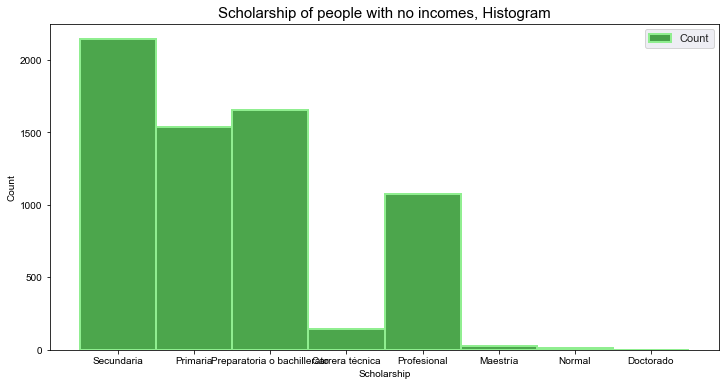

In [43]:
# By scholarship
print("Scholarship")
print(no_incomes['Scholarship'].value_counts())

fig, ax = plt.subplots(figsize =(12, 6))
sns.set(color_codes=True)
sns.histplot(no_incomes['Scholarship'], bins=8, color = 'green', ec = 'lightgreen', lw = 2, alpha = .7, label = 'Count', legend = True)
ax.set_title('Scholarship of people with no incomes, Histogram', fontsize = 15)
ax.legend();


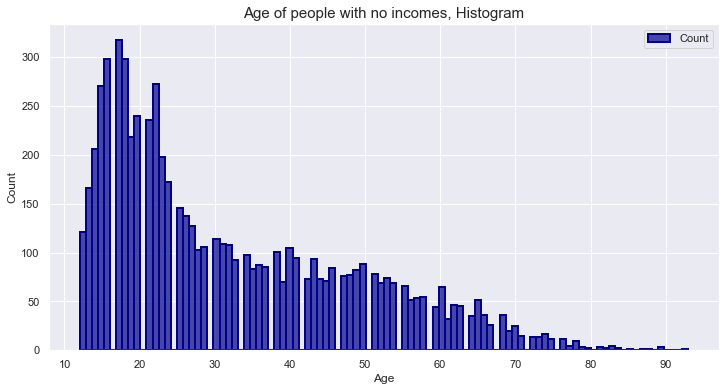

In [44]:
# By Age

fig, ax = plt.subplots(figsize =(12, 6))
sns.set(color_codes=True)
sns.histplot(no_incomes['Age'], bins=100, color = 'darkblue', ec = 'darkblue', lw = 2, alpha = .7, label = 'Count', legend = True)
ax.set_title('Age of people with no incomes, Histogram', fontsize = 15)
ax.legend();

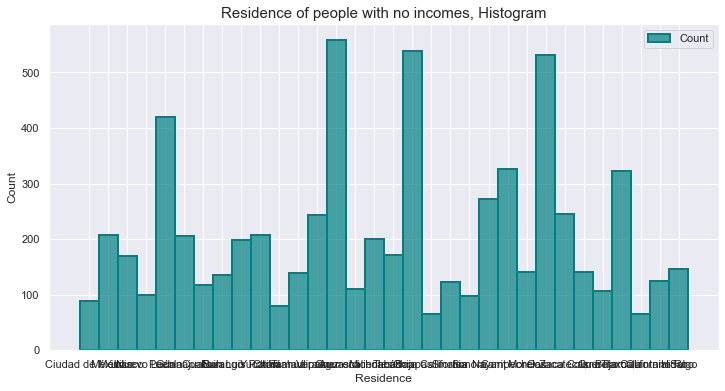

In [45]:
# By Residence

fig, ax = plt.subplots(figsize =(12, 6))
sns.set(color_codes=True)
sns.histplot(no_incomes['Residence'], bins=35, color = 'teal', ec = 'teal', lw = 2, alpha = .7, label = 'Count', legend = True)
ax.set_title('Residence of people with no incomes, Histogram', fontsize = 15)
ax.legend();

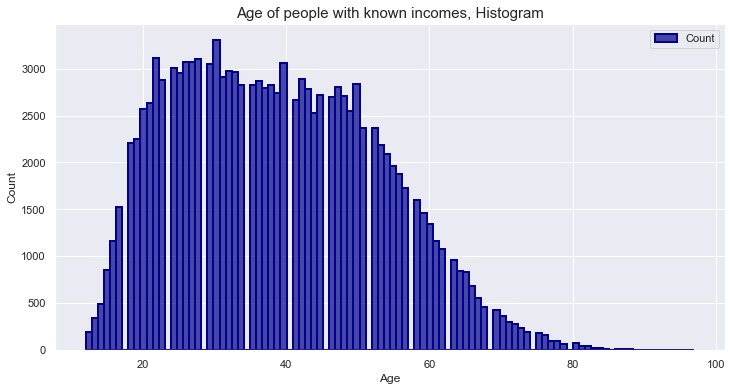

In [46]:
# Now for the purposes of filling in the nulls we need to get some statistics of the data we have.
with_known_incomes = new_employed[new_employed['Monthly Income']>=0]

# Let's dive into Age for the new dataset, to see if it changes.
# By Age

fig, ax = plt.subplots(figsize =(12, 6))
sns.set(color_codes=True)
sns.histplot(with_known_incomes['Age'], bins=100, color = 'darkblue', ec = 'darkblue', lw = 2, alpha = .7, label = 'Count', legend = True)
ax.set_title('Age of people with known incomes, Histogram', fontsize = 15)
ax.legend();

Scholarship
Secundaria                     38333
Preparatoria o bachillerato    30827
Profesional                    27227
Primaria                       22820
Carrera técnica                 4119
Maestría                        2208
Doctorado                        374
Normal                           147
Name: Scholarship, dtype: int64


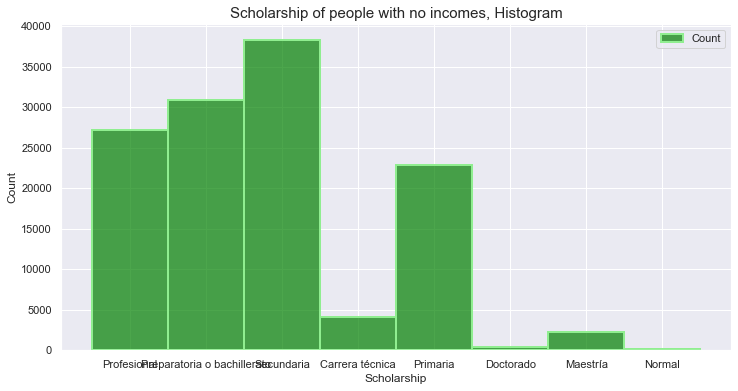

In [47]:
# By scholarship

print("Scholarship")
print(with_known_incomes['Scholarship'].value_counts())

fig, ax = plt.subplots(figsize =(12, 6))
sns.set(color_codes=True)
sns.histplot(with_known_incomes['Scholarship'], bins=8, color = 'green', ec = 'lightgreen', lw = 2, alpha = .7, label = 'Count', legend = True)
ax.set_title('Scholarship of people with no incomes, Histogram', fontsize = 15)
ax.legend();

Economic Sector
Servicios                  57122
Comercio                   25038
Industria manufacturera    21864
Construcción               11005
Agropecuario                9865
Otros                       1161
Name: By Economic Sector, dtype: int64


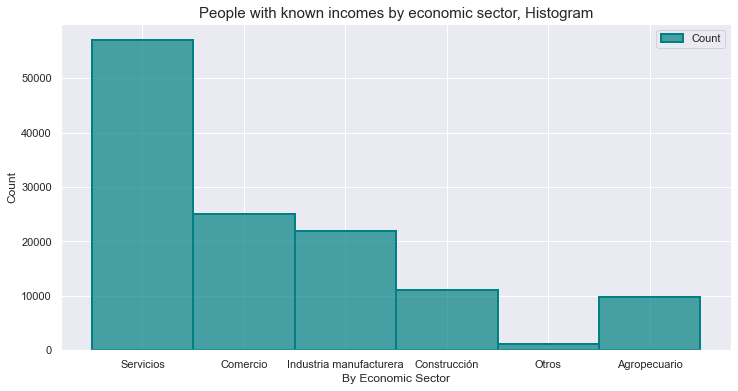

In [48]:
# By Economic Sector

print("Economic Sector")
print(with_known_incomes['By Economic Sector'].value_counts())

fig, ax = plt.subplots(figsize =(12, 6))
sns.set(color_codes=True)
sns.histplot(with_known_incomes['By Economic Sector'], bins=8, color = 'teal', ec = 'teal', lw = 2, alpha = .7, label = 'Count', legend = True)
ax.set_title('People with known incomes by economic sector, Histogram', fontsize = 15)
ax.legend();

In [49]:
# By Income
with_known_incomes['Monthly Income'].describe()

count    126055.000000
mean       8131.892706
std        7380.446417
min           0.000000
25%        4300.000000
50%        6880.000000
75%       10000.000000
max      300000.000000
Name: Monthly Income, dtype: float64

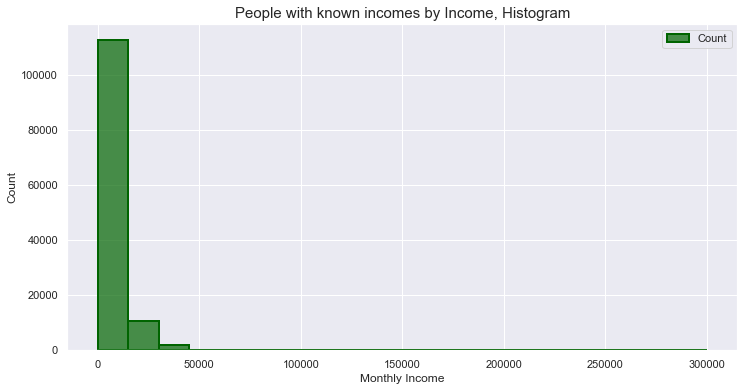

In [50]:
# Graph by Income

fig, ax = plt.subplots(figsize =(12, 6))
sns.set(color_codes=True)
sns.histplot(with_known_incomes['Monthly Income'], bins= 20, color = 'darkgreen', ec = 'darkgreen', lw = 2, alpha = .7, label = 'Count', legend = True)
ax.set_title('People with known incomes by Income, Histogram', fontsize = 15)
ax.legend();

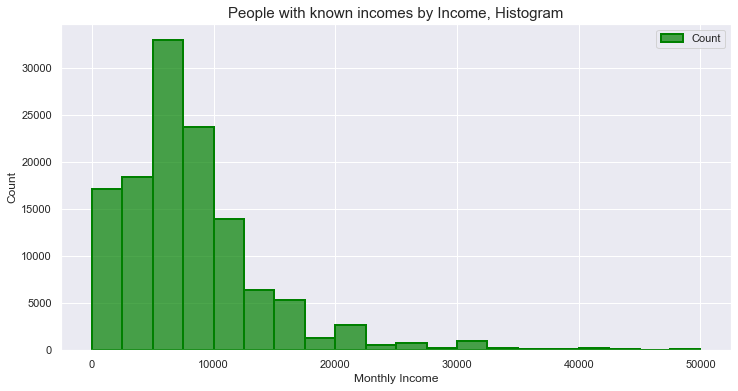

In [51]:
# Graph snapshot from $0 to $50,000

fig, ax = plt.subplots(figsize =(12, 6))
sns.set(color_codes=True)
sns.histplot(with_known_incomes['Monthly Income'], bins=[0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000, 27500, 30000, 32500, 35000, 37500, 40000, 42500, 45000, 47500, 50000], color = 'green', ec = 'green', lw = 2, alpha = .7, label = 'Count', legend = True)
ax.set_title('People with known incomes by Income, Histogram', fontsize = 15)
ax.legend();

#plt.savefig("incomes-hist.jpg")

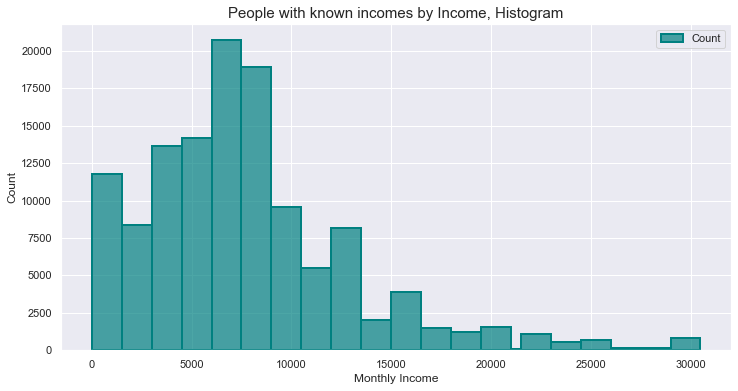

In [52]:
# Graph snapshot from $0 to $30,000

fig, ax = plt.subplots(figsize =(12, 6))
sns.set(color_codes=True)
sns.histplot(with_known_incomes['Monthly Income'], bins=[0, 1500, 3000, 4500, 6000, 7500, 9000, 10500, 12000, 13500, 15000, 16500, 18000, 19500, 21000, 21500, 23000, 24500, 26000, 27500, 29000, 30500], color = 'teal', ec = 'teal', lw = 2, alpha = .7, label = 'Count', legend = True)
ax.set_title('People with known incomes by Income, Histogram', fontsize = 15)
ax.legend();

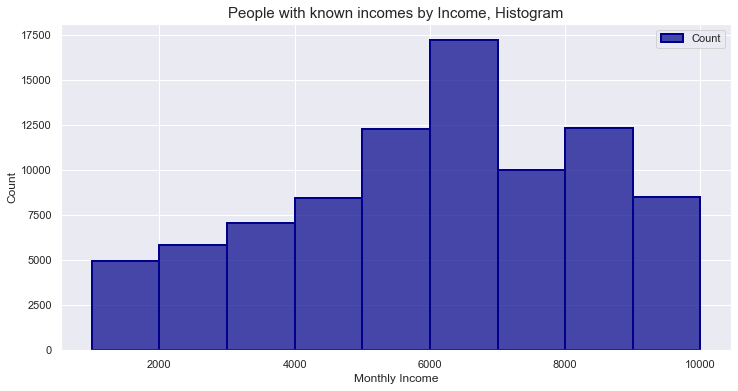

In [53]:
# Graph snapshot from $0 to $15000

fig, ax = plt.subplots(figsize =(12, 6))
sns.set(color_codes=True)
sns.histplot(with_known_incomes['Monthly Income'], bins=[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000], color = 'darkblue', ec = 'darkblue', lw = 2, alpha = .7, label = 'Count', legend = True)
ax.set_title('People with known incomes by Income, Histogram', fontsize = 15)
ax.legend();

In [54]:
import statistics
statistics.median(with_known_incomes['Monthly Income'])

6880.0

Gender
Hombre    0.573527
Mujer     0.426473
Name: Gender, dtype: float64


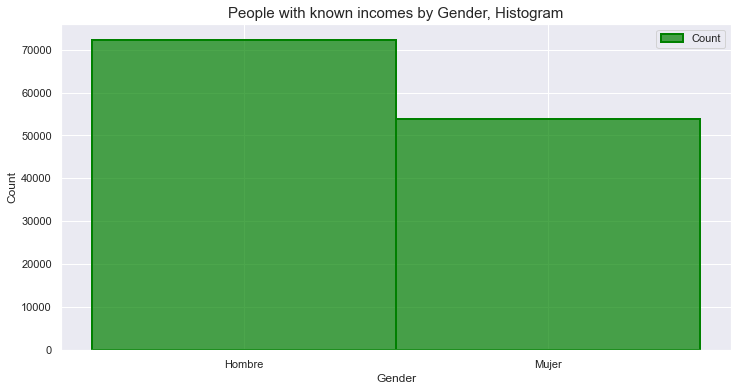

In [55]:
# Graph by Gender
print("Gender")
print(with_known_incomes['Gender'].value_counts(normalize = True))


fig, ax = plt.subplots(figsize =(12, 6))
sns.set(color_codes=True)
sns.histplot(with_known_incomes['Gender'], bins= 2, color = 'green', ec = 'green', lw = 2, alpha = .7, label = 'Count', legend = True)
ax.set_title('People with known incomes by Gender, Histogram', fontsize = 15)
ax.legend();

#plt.savefig("gender-hist.jpg")

In [56]:
# Let's dive now into the mayor incomes, the top 1%

mayor_incomes = new_employed[new_employed['Monthly Income']>= new_employed['Monthly Income'].quantile(.99) ]
mayor_incomes

,Residence,Gender,Age,Literacy,Scholarship,Career,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Monthly Income
44,Ciudad de México,Mujer,36,Sí,Secundaria,N/A,Está soltero(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Comercio,55000.0
363,Ciudad de México,Mujer,50,Sí,Doctorado,Historia y arqueología,Está casado(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,88000.0
384,Ciudad de México,Mujer,56,Sí,Primaria,N/A,Está soltero(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores por cuenta propia,Comercio,90000.0
673,Ciudad de México,Hombre,29,Sí,Profesional,Planes multidisciplinarios o generales del cam...,Está soltero(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,60000.0
702,Ciudad de México,Hombre,44,Sí,Profesional,Desarrollo de software,Está casado(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,35000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
382607,Veracruz,Mujer,44,Sí,Preparatoria o bachillerato,N/A,Vive con su pareja en unión libre,Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores por cuenta propia,Comercio,36000.0
384979,Veracruz,Hombre,53,Sí,Secundaria,N/A,Está separado(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Empleadores,Agropecuario,48000.0
386591,Yucatán,Mujer,39,Sí,Preparatoria o bachillerato,N/A,Vive con su pareja en unión libre,Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,60000.0
387288,Zacatecas,Hombre,46,Sí,Secundaria,N/A,Está casado(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Construcción,36550.0


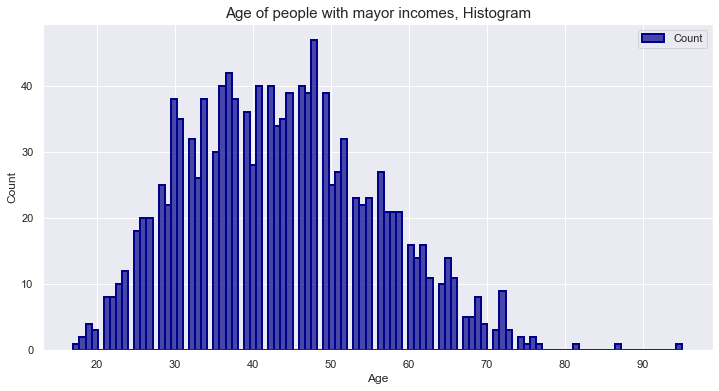

In [57]:
# By Age

fig, ax = plt.subplots(figsize =(12, 6))
sns.set(color_codes=True)
sns.histplot(mayor_incomes['Age'], bins=100, color = 'darkblue', ec = 'darkblue', lw = 2, alpha = .7, label = 'Count', legend = True)
ax.set_title('Age of people with mayor incomes, Histogram', fontsize = 15)
ax.legend();

Scholarship
Profesional                    0.501182
Preparatoria o bachillerato    0.146572
Maestría                       0.126084
Secundaria                     0.107959
Primaria                       0.048857
Doctorado                      0.048069
Carrera técnica                0.021277
Name: Scholarship, dtype: float64


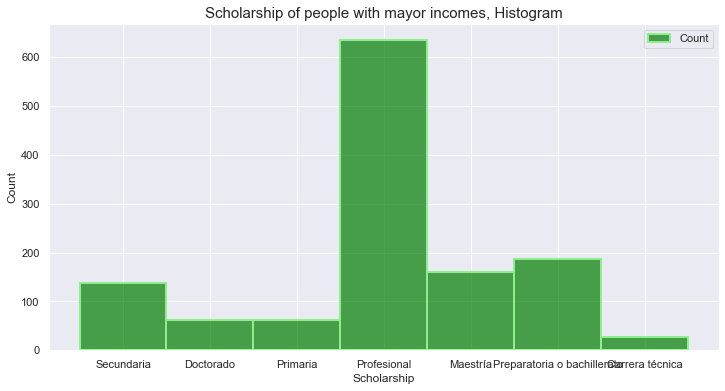

In [58]:
# By scholarship

print("Scholarship")
print(mayor_incomes['Scholarship'].value_counts(normalize = True))

fig, ax = plt.subplots(figsize =(12, 6))
sns.set(color_codes=True)
sns.histplot(mayor_incomes['Scholarship'], bins=8, color = 'green', ec = 'lightgreen', lw = 2, alpha = .7, label = 'Count', legend = True)
ax.set_title('Scholarship of people with mayor incomes, Histogram', fontsize = 15)
ax.legend();

Economic Sector
Servicios                  740
Industria manufacturera    163
Comercio                   159
Construcción                96
Otros                       61
Agropecuario                50
Name: By Economic Sector, dtype: int64


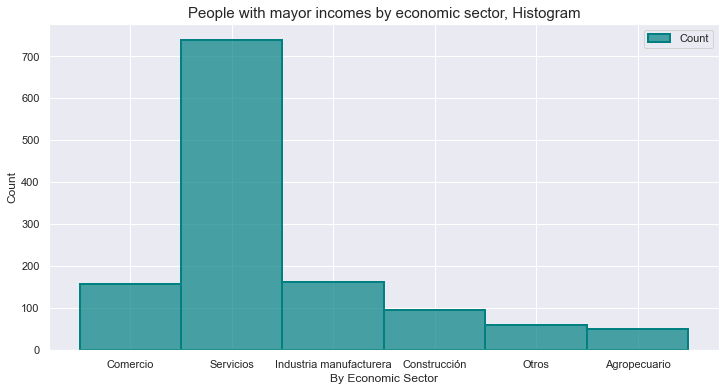

In [59]:
# By Economic Sector

print("Economic Sector")
print(mayor_incomes['By Economic Sector'].value_counts())

fig, ax = plt.subplots(figsize =(12, 6))
sns.set(color_codes=True)
sns.histplot(mayor_incomes['By Economic Sector'], bins=8, color = 'teal', ec = 'teal', lw = 2, alpha = .7, label = 'Count', legend = True)
ax.set_title('People with mayor incomes by economic sector, Histogram', fontsize = 15)
ax.legend();

count      1269.000000
mean      52012.229314
std       24033.107651
min       35000.000000
25%       40000.000000
50%       43000.000000
75%       60000.000000
max      300000.000000
Name: Monthly Income, dtype: float64


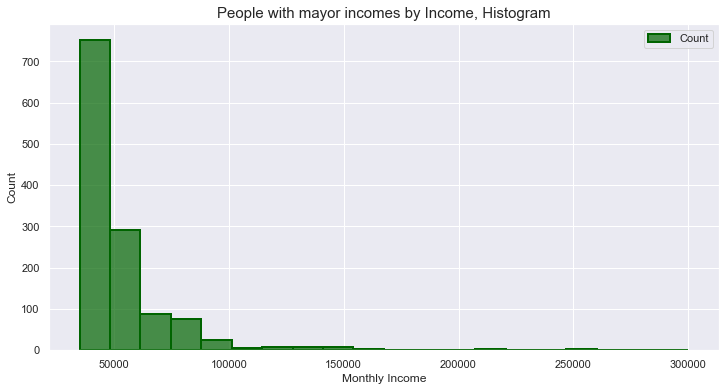

In [60]:
# Graph by Income
print(mayor_incomes['Monthly Income'].describe())

fig, ax = plt.subplots(figsize =(12, 6))
sns.set(color_codes=True)
sns.histplot(mayor_incomes['Monthly Income'], bins= 20, color = 'darkgreen', ec = 'darkgreen', lw = 2, alpha = .7, label = 'Count', legend = True)
ax.set_title('People with mayor incomes by Income, Histogram', fontsize = 15)
ax.legend();

Gender
Hombre    0.754137
Mujer     0.245863
Name: Gender, dtype: float64


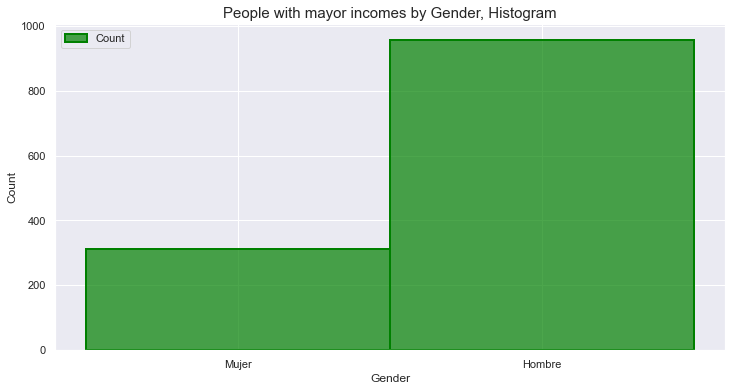

In [61]:
# Graph by Gender
print("Gender")
print(mayor_incomes['Gender'].value_counts(normalize = True))


fig, ax = plt.subplots(figsize =(12, 6))
sns.set(color_codes=True)
sns.histplot(mayor_incomes['Gender'], bins= 2, color = 'green', ec = 'green', lw = 2, alpha = .7, label = 'Count', legend = True)
ax.set_title('People with mayor incomes by Gender, Histogram', fontsize = 15)
ax.legend();

#plt.savefig("gender-hist-mayorincomes.jpg")

In [62]:
# Because of the distribution of the data, taking into account we have a lot at the beginning of our  monthly income graph, 
# I'm going to use the median to fill in the missing data into our main dataset. 

new_employed.loc[new_employed['Monthly Income'].isna(), 'Monthly Income'] = 6880

In [63]:
new_employed['Monthly Income'].describe()

count    180370.000000
mean       7754.908993
std        6196.597671
min           0.000000
25%        5590.000000
50%        6880.000000
75%        8600.000000
max      300000.000000
Name: Monthly Income, dtype: float64

In [64]:
# This will be the clean dataset that we will be using
print(new_employed.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180370 entries, 0 to 389432
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Residence           180370 non-null  object 
 1   Gender              180370 non-null  object 
 2   Age                 180370 non-null  int64  
 3   Literacy            180370 non-null  object 
 4   Scholarship         180370 non-null  object 
 5   Career              180370 non-null  object 
 6   Marital Status      180370 non-null  object 
 7   Urban or Rural      180370 non-null  object 
 8   Economic Zone       180370 non-null  object 
 9   By Position         180370 non-null  object 
 10  By Economic Sector  180370 non-null  object 
 11  Monthly Income      180370 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 17.9+ MB
None


# Modeling 


## First Try - Regression Tree

Our first try will be a regression tree, for that I will need to hot encode and normalize my data.

In [65]:
# Set our target and prediction features.

y = new_employed['Monthly Income']
X = new_employed.drop(columns=['Monthly Income'], axis=1)

# Hot encoded with get dummmies our categorical data

rel_columns = ['Age','Gender', 'Literacy', 'Scholarship','Career', 'Marital Status', 'Urban or Rural', 'Residence','Economic Zone', 'By Position','By Economic Sector']
X = pd.get_dummies(X[rel_columns], drop_first=True, dtype=float)

# Normalize our numerical data

scaler = MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X),
            columns=X.columns, index=X.index) 

# Split in training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Initiate Decision Tree Regressor

rt = DecisionTreeRegressor(criterion = 'mse', max_depth=5)

# Fit the model

model_r = rt.fit(X_train, y_train)

# Make predictions on the test data

y_pred = model_r.predict(X_test)

# Get metrics to evaluate the performance

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Score is:', r2_score(y_test, y_pred))

Mean Absolute Error: 3030.847646803176
Mean Squared Error: 33765894.49412266
Root Mean Squared Error: 5810.842838532347
R Squared Score is: 0.14055112233353584


### 14% of our dataset explained :( 

As we can see this model just explain the 14% of our data which is extremely low. We can also look at our root mean squared error and determine that there's an error of $5,710 which is huge if we take into account the distribution of our data. This means that because of the distribution of the data and the feautures we have it is nos possible to determine with enough certainty if a numerical prediction. 

Eventhough I will try to tune this model by determining the optimal split size and tree depth.

## Tunning

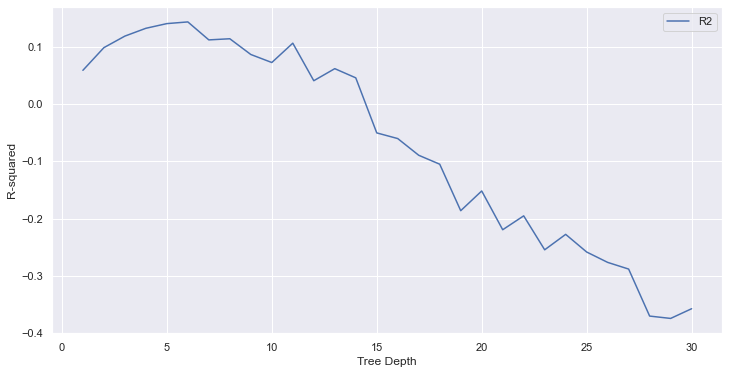

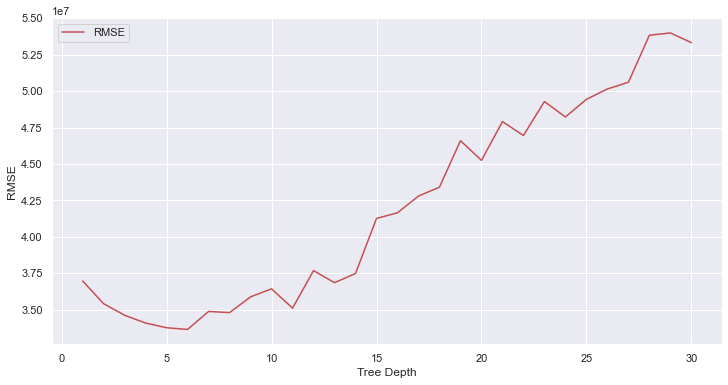

In [66]:
# Define a performance function
def performance(y_true, y_predict):
    r2 = r2_score(y_true, y_predict)
    rmse = metrics.mean_squared_error(y_true, y_predict)
    return [r2, rmse]


# Identify the optimal tree depth for given data
max_depths = list(range(1, 31))
mse_results = []
r2_results = []

for max_depth in max_depths:
    regressor = DecisionTreeRegressor(max_depth=max_depth, 
                                      random_state=45)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    score = performance(y_test, y_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(max_depths, r2_results, 'b', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(max_depths, mse_results, 'r', label='RMSE')
plt.xlabel('Tree Depth')
plt.ylabel('RMSE')
plt.legend()
plt.show()

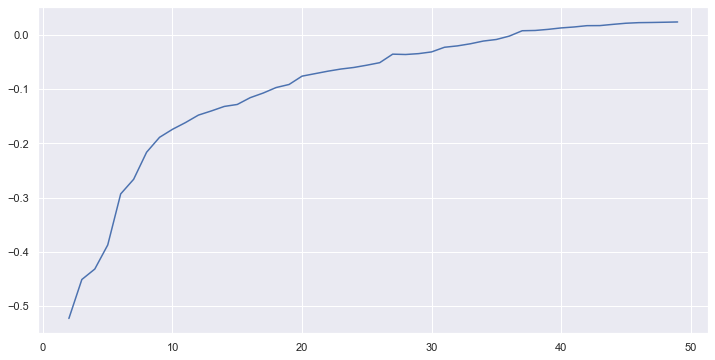

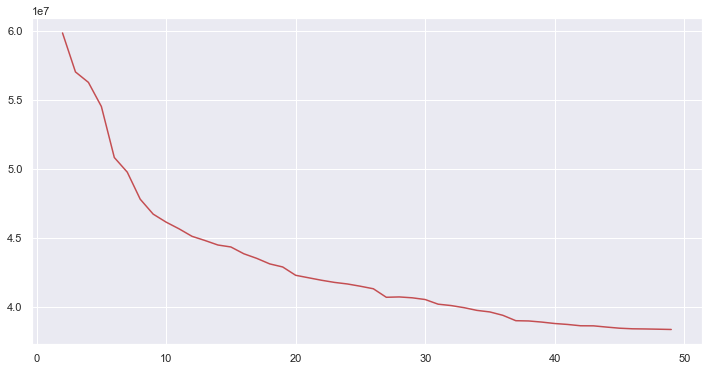

In [67]:
# Identify the optimal minimum split size for given data
min_samples_splits = np.arange(2, 50)
mse_results = []
r2_results = []

for min_samples_split in min_samples_splits:
    regressor = DecisionTreeRegressor(min_samples_split=int(min_samples_split),
                                      random_state=45)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    score = performance(y_test, y_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, r2_results, 'b', label='R2')
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, mse_results, 'r', label='RMSE')
plt.show()

In [68]:
regressor = DecisionTreeRegressor(min_samples_split=100, max_depth=8, splitter='best', min_samples_leaf= 100)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
score = performance(y_test, y_pred)
score[0], score[1], regressor

(0.15912228556399344,
 33036273.507269595,
 DecisionTreeRegressor(max_depth=8, min_samples_leaf=100, min_samples_split=100))

###   15% of our dataset explained :S 

As we can see, the optimization was minimal.

## Linear Multiple Regression
Lets try another approach.

In [69]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Monthly Income   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     177.9
Date:                Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:54:31   Log-Likelihood:            -1.8125e+06
No. Observations:              180370   AIC:                         3.625e+06
Df Residuals:                  180140   BIC:                         3.628e+06
Df Model:                         229                                         
Covariance Type:            nonrobust                                         
                                                                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
---------

### 18% of the dataset explained :S

As we can see we are not getting better results. 
Because of that we will convert this problem in a classification problem.

## Second Try- A Classification Problem - Decission Tree

For that I will need to create categories for our monthly income target. For starts, I will create 10 level of income, divided every 10% of the data. 



In [70]:
#  First we create the new column called 'Income Level'

new_employed['Income Level']= new_employed['Monthly Income']

# Second, we determine our levels

level_1 = new_employed['Income Level'].quantile(.10)
level_2 = new_employed['Income Level'].quantile(.20)
level_3 = new_employed['Income Level'].quantile(.30)
level_4 = new_employed['Income Level'].quantile(.40)
level_5 = new_employed['Income Level'].quantile(.50)
level_6 = new_employed['Income Level'].quantile(.60)
level_7 = new_employed['Income Level'].quantile(.70)
level_8 = new_employed['Income Level'].quantile(.80)
level_9 = new_employed['Income Level'].quantile(.90)

# Now we assign the labels to our data

new_employed.loc[(new_employed['Monthly Income'] <= level_1, 'Income Level')] = 'Level 1'
new_employed.loc[((new_employed['Monthly Income'] <= level_2) & (new_employed['Monthly Income'] > level_1), 'Income Level')] = 'Level 2'
new_employed.loc[((new_employed['Monthly Income'] <= level_3) & (new_employed['Monthly Income'] > level_2), 'Income Level')] = 'Level 3'
new_employed.loc[((new_employed['Monthly Income'] <= level_4) & (new_employed['Monthly Income'] > level_3), 'Income Level')] = 'Level 4'
new_employed.loc[((new_employed['Monthly Income'] <= level_5) & (new_employed['Monthly Income'] > level_4), 'Income Level')] = 'Level 5'
new_employed.loc[((new_employed['Monthly Income'] <= level_6) & (new_employed['Monthly Income'] > level_5), 'Income Level')] = 'Level 6'
new_employed.loc[((new_employed['Monthly Income'] <= level_7) & (new_employed['Monthly Income'] > level_6), 'Income Level')] = 'Level 7'
new_employed.loc[((new_employed['Monthly Income'] <= level_8) & (new_employed['Monthly Income'] > level_7), 'Income Level')] = 'Level 8'
new_employed.loc[((new_employed['Monthly Income'] <= level_9) & (new_employed['Monthly Income'] > level_8), 'Income Level')] = 'Level 9'
new_employed.loc[((new_employed['Monthly Income'] > level_9), 'Income Level')] = 'Level 10'


print('Max income by Level')
print('Level 1 = $', level_1)
print('Level 2 = $', level_2)
print('Level 3 = $', level_3)
print('Level 4 = $', level_4)
print('Level 5 = $', level_5)
print('Level 6 = $', level_6)
print('Level 7 = $', level_7)
print('Level 8 = $', level_8)
print('Level 9 = $', level_9)
print('Level 10 = $', new_employed['Monthly Income'].max() )

print('')
print('Countdown %')
print(new_employed['Income Level'].value_counts(normalize = True))

Max income by Level
Level 1 = $ 2580.0
Level 2 = $ 5000.0
Level 3 = $ 6450.0
Level 4 = $ 6880.0
Level 5 = $ 6880.0
Level 6 = $ 6880.0
Level 7 = $ 7740.0
Level 8 = $ 9030.0
Level 9 = $ 12900.0
Level 10 = $ 300000.0

Countdown %
Level 4     0.315956
Level 3     0.140151
Level 9     0.111288
Level 1     0.109979
Level 2     0.095931
Level 10    0.087670
Level 8     0.084587
Level 7     0.054438
Name: Income Level, dtype: float64


In [71]:
# We will set again our new variables

y = new_employed['Income Level']
X = new_employed.drop(columns=['Monthly Income', 'Income Level'], axis=1)

# Hot encode the categorical data

rel_columns = ['Age','Gender', 'Literacy', 'Scholarship','Career', 'Marital Status', 'Urban or Rural', 'Residence','Economic Zone', 'By Position','By Economic Sector']
X = pd.get_dummies(X[rel_columns], drop_first=True, dtype=float)

# Normalize the numerical data

scaler = MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X),
            columns=X.columns, index=X.index) 

# Split into train and test subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

# Initiate our Decision Tree Classifier

clf = DecisionTreeClassifier(criterion='entropy')

# Train the model

clf.fit(X_train, y_train)

# Make predictions

y_preds = clf.predict(X_test)

# Evaluation of our model performance

print('Accuracy: ', accuracy_score(y_test, y_preds))

Accuracy:  0.30600062833804587


### 30% of accuracy on our second vanilla model

## Tuning 

The accuracy of the model seems a bit better but is still very low. There are 8 categories and our model is only 30% accurate. I will try to achieve better results by prunning the model. 

In [72]:
# In this ocassion i will change to gini criterion and keep the max depht to 8 


target = new_employed['Income Level']
data = new_employed.drop(columns=['Monthly Income', 'Income Level'], axis=1)

data = pd.get_dummies(data[rel_columns], drop_first=True, dtype=float)

scaler = MinMaxScaler()
data=pd.DataFrame(scaler.fit_transform(data),
            columns=data.columns, index=data.index) 

data_train, data_test, target_train, target_test = train_test_split(data, target, 
                                                                    test_size = 0.25, random_state=123)
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=8) 
tree_clf.fit(data_train, target_train)

# Test set predictions
pred = tree_clf.predict(data_test)

# classification report

print(classification_report(target_test, pred))
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

              precision    recall  f1-score   support

     Level 1       0.55      0.57      0.56      5042
    Level 10       0.00      0.00      0.00      3905
     Level 2       0.00      0.00      0.00      4317
     Level 3       0.26      0.37      0.31      6241
     Level 4       0.38      0.82      0.52     14267
     Level 7       0.00      0.00      0.00      2428
     Level 8       0.35      0.02      0.04      3812
     Level 9       0.37      0.03      0.05      5081

    accuracy                           0.38     45093
   macro avg       0.24      0.23      0.19     45093
weighted avg       0.29      0.38      0.28     45093

Testing Accuracy for Decision Tree Classifier: 37.89%


In [73]:
# Now I will add min splits and min sample leafes 

# Instantiate and fit a DecisionTreeClassifier
tree_clf2 = DecisionTreeClassifier(criterion='gini', min_samples_split=8, max_depth=100, splitter='best', min_samples_leaf= 100) 

tree_clf2.fit(data_train, target_train)

pred2 = tree_clf2.predict(data_test)

# Evaluation and metrics

print('Train score')
print(tree_clf2.score(data_train, target_train))

print('Test score')
print(tree_clf2.score(data_test, target_test))

print(classification_report(target_test, pred2))
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred2) * 100))



Train score
0.40848037729991055
Test score
0.3945623489233362
              precision    recall  f1-score   support

     Level 1       0.58      0.58      0.58      5042
    Level 10       0.30      0.17      0.22      3905
     Level 2       0.28      0.08      0.12      4317
     Level 3       0.29      0.35      0.32      6241
     Level 4       0.42      0.76      0.54     14267
     Level 7       0.16      0.00      0.01      2428
     Level 8       0.22      0.05      0.08      3812
     Level 9       0.26      0.13      0.18      5081

    accuracy                           0.39     45093
   macro avg       0.31      0.27      0.26     45093
weighted avg       0.35      0.39      0.34     45093

Testing Accuracy for Decision Tree Classifier: 39.46%


### 39.46% of accuracy on our second model after tunning

By tunning and prunning the decision tree we were able to enhace the performance to 39.46% but it is still low. 

## Bagging Classifier

In [74]:
# Our last resource will be a bagging classifier

# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', min_samples_split=8, max_depth=100, splitter='best', min_samples_leaf= 100), 
                                 n_estimators=20)
# Fit to the training data
bagged_tree.fit(data_train, target_train)

pred3 = bagged_tree.predict(data_test)

# Training accuracy score

print('Train score')
print(bagged_tree.score(data_train, target_train))

print('Test score')
print(bagged_tree.score(data_test, target_test))

print(classification_report(target_test, pred3))
print("Testing Accuracy for Bagging Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred3) * 100))


Train score
0.4095892132439365
Test score
0.3986428048699355


C:\Users\dfloresalbores\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Level 1       0.61      0.56      0.58      5042
    Level 10       0.33      0.14      0.20      3905
     Level 2       0.28      0.07      0.12      4317
     Level 3       0.29      0.38      0.33      6241
     Level 4       0.41      0.79      0.54     14267
     Level 7       0.00      0.00      0.00      2428
     Level 8       0.31      0.04      0.08      3812
     Level 9       0.29      0.10      0.14      5081

    accuracy                           0.40     45093
   macro avg       0.31      0.26      0.25     45093
weighted avg       0.35      0.40      0.33     45093

Testing Accuracy for Bagging Tree Classifier: 39.86%


### 40.04% of accuracy in our second model after tunning and bagging

# Third Try - Decission Classifier  with Three Labels

In the intent of achieving a better accuracy i will low the quantity of income levels to 3.

In [75]:
# Reset the column
new_employed['Income Level']= new_employed['Monthly Income']

level_1 = new_employed['Income Level'].quantile(.40)

level_2 = new_employed['Income Level'].quantile(.80)

# Re-assign labels

new_employed.loc[(new_employed['Monthly Income'] <= level_1, 'Income Level')] = 'Level 1'
new_employed.loc[((new_employed['Monthly Income'] <= level_2) & (new_employed['Monthly Income'] > level_1),'Income Level')] = 'Level 2'
new_employed.loc[(new_employed['Monthly Income'] > level_2, 'Income Level')] = 'Level 3'



print('Max income by Level')
print('Level 1 = $', level_1)
print('Level 2 = $', level_2)
print('Level 3 = $', new_employed['Monthly Income'].max() )

print('')
print('Countdown %')
print(new_employed['Income Level'].value_counts(normalize = True))


Max income by Level
Level 1 = $ 6880.0
Level 2 = $ 9030.0
Level 3 = $ 300000.0

Countdown %
Level 1    0.662017
Level 3    0.198958
Level 2    0.139025
Name: Income Level, dtype: float64


## Vanilla Decission Tree

In [76]:
# First Decission Tree vanilla model

y = new_employed['Income Level']
X = new_employed.drop(columns=['Monthly Income', 'Income Level'], axis=1)

rel_columns = ['Age','Gender', 'Literacy', 'Scholarship','Career', 'Marital Status', 'Urban or Rural', 'Residence','Economic Zone', 'By Position','By Economic Sector']
X = pd.get_dummies(X[rel_columns], drop_first=True, dtype=float)

scaler = MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X),
            columns=X.columns, index=X.index) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

clfa = DecisionTreeClassifier(criterion='entropy')

clfa.fit(X_train, y_train)

y_predsa = clfa.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_predsa))

Accuracy:  0.5869601374951489


### 58.65% of accuracy on third vanilla model

## Prunning the Decission Tree

In [77]:
# With gini criterion and keep the max depht to 8 

target = new_employed['Income Level']
data = new_employed.drop(columns=['Monthly Income', 'Income Level'], axis=1)

data = pd.get_dummies(data[rel_columns], drop_first=True, dtype=float)

scaler = MinMaxScaler()
data=pd.DataFrame(scaler.fit_transform(data),
            columns=data.columns, index=data.index) 

data_train, data_test, target_train, target_test = train_test_split(data, target, 
                                                                    test_size = 0.25, random_state=123)
# Instantiate and fit a DecisionTreeClassifier
tree_clfa = DecisionTreeClassifier(criterion='gini', max_depth=8) 
tree_clfa.fit(data_train, target_train)

# Test set predictions
preda = tree_clfa.predict(data_test)

# classification report

print(classification_report(target_test, preda))
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, preda) * 100))

              precision    recall  f1-score   support

     Level 1       0.68      0.98      0.80     29867
     Level 2       0.50      0.05      0.09      6240
     Level 3       0.45      0.08      0.14      8986

    accuracy                           0.67     45093
   macro avg       0.54      0.37      0.34     45093
weighted avg       0.61      0.67      0.57     45093

Testing Accuracy for Decision Tree Classifier: 66.89%


In [78]:
# Now I will add min splits and min sample leafes 

# Instantiate and fit a DecisionTreeClassifier
tree_clf2a = DecisionTreeClassifier(criterion='gini', min_samples_split=8, max_depth=100, splitter='best', min_samples_leaf= 100) 

tree_clf2a.fit(data_train, target_train)

pred2a = tree_clf2a.predict(data_test)

# Evaluation and metrics

print('Train score')
print(tree_clf2a.score(data_train, target_train))

print('Test score')
print(tree_clf2a.score(data_test, target_test))

print(classification_report(target_test, pred2a))
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred2a) * 100))


Train score
0.6831981785521559
Test score
0.6760694564566563
              precision    recall  f1-score   support

     Level 1       0.70      0.93      0.80     29867
     Level 2       0.45      0.05      0.09      6240
     Level 3       0.47      0.25      0.33      8986

    accuracy                           0.68     45093
   macro avg       0.54      0.41      0.41     45093
weighted avg       0.62      0.68      0.61     45093

Testing Accuracy for Decision Tree Classifier: 67.61%


### 67.61% of accuracy on our third model after tunning

## Optimization - Bagging Classifier

In [79]:
# Our last resource will be a bagging classifier

# Instantiate a BaggingClassifier
bagged_treea =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', min_samples_split=8, max_depth=100, splitter='best', min_samples_leaf= 100), 
                                 n_estimators=20)
# Fit to the training data
bagged_treea.fit(data_train, target_train)

pred3a = bagged_treea.predict(data_test)

# Training accuracy score

print('Train score')
print(bagged_treea.score(data_train, target_train))

print('Test score')
print(bagged_treea.score(data_test, target_test))

print(classification_report(target_test, pred3a))
print("Testing Accuracy for Bagging Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred3a) * 100))

Train score
0.6831981785521559
Test score
0.677244805180405
              precision    recall  f1-score   support

     Level 1       0.70      0.94      0.80     29867
     Level 2       0.48      0.05      0.09      6240
     Level 3       0.48      0.25      0.32      8986

    accuracy                           0.68     45093
   macro avg       0.56      0.41      0.41     45093
weighted avg       0.63      0.68      0.61     45093

Testing Accuracy for Bagging Tree Classifier: 67.72%


### 67.83% of accuracy on our third model after tunning and bagging

This seems to be our best model so far. Due to time and resources we will leave it here, and explore our model. 

# Model Exploration 
Let's find out which features were more important for our model

In [80]:
# Feature importance

tree_clf2a.feature_importances_

array([0.09393277, 0.11123205, 0.        , 0.        , 0.00168884,
       0.        , 0.01516333, 0.00184221, 0.00159394, 0.00162385,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00039981, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00043354, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

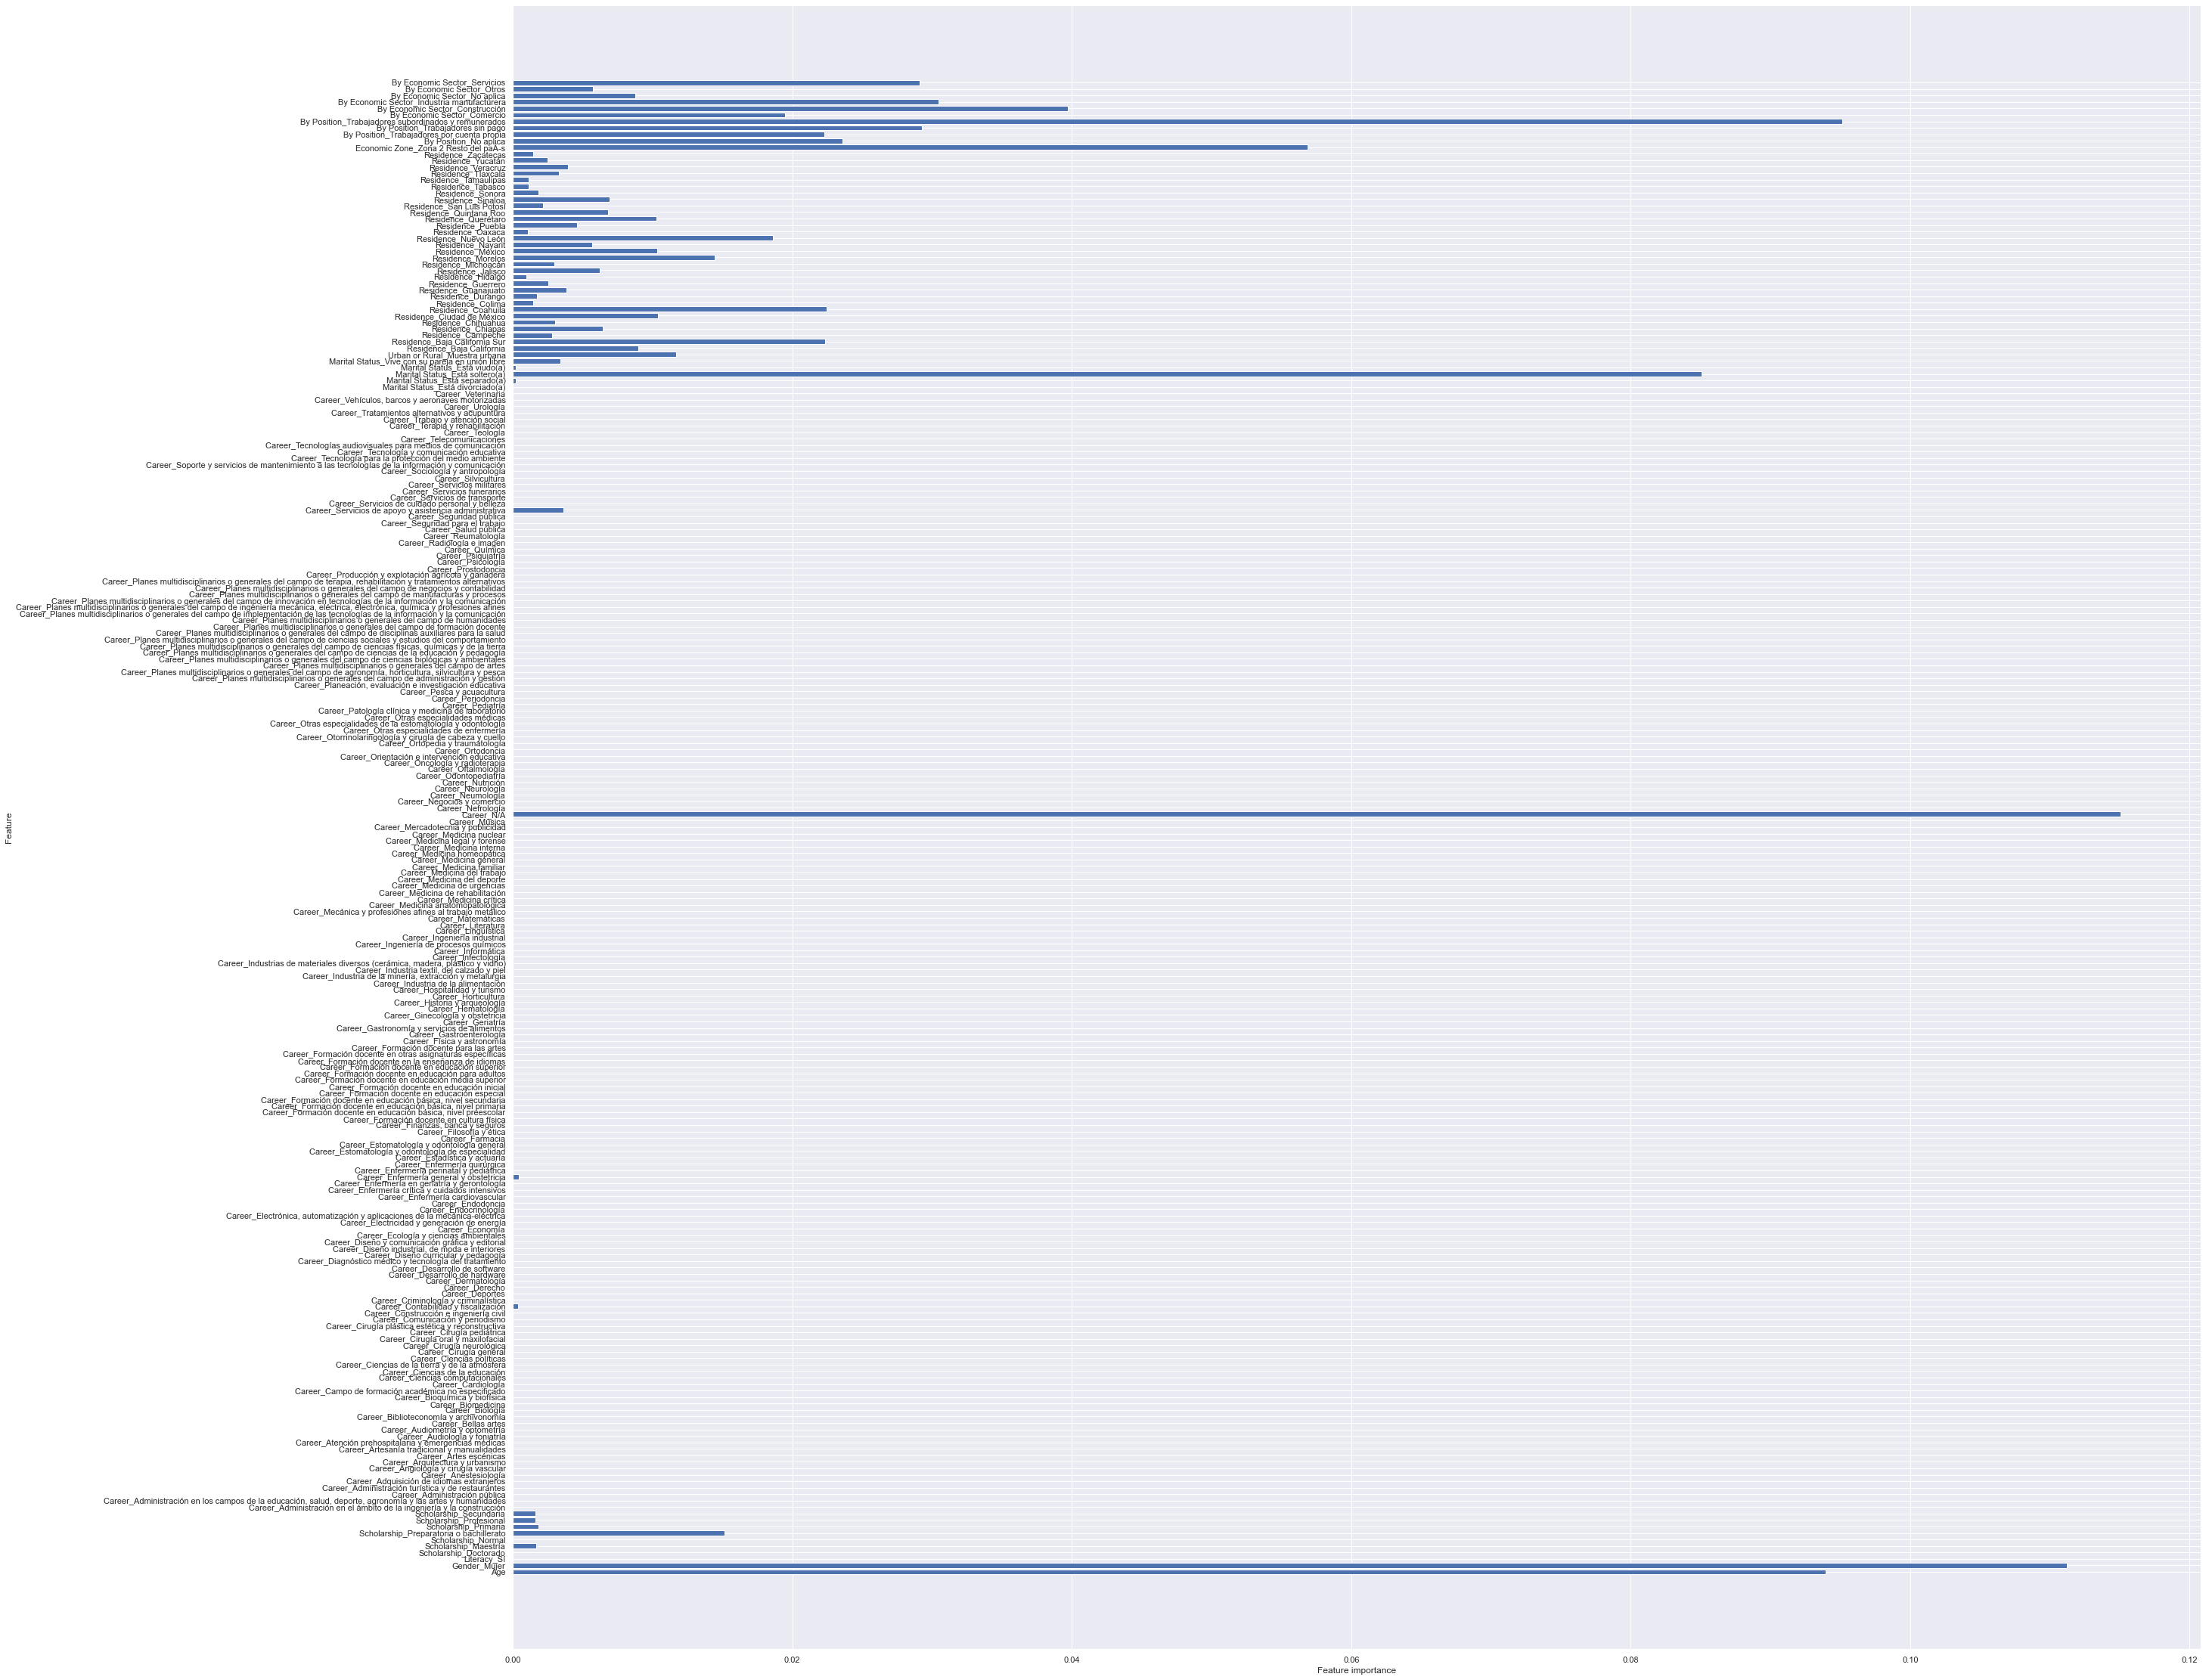

In [81]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(40,40))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf2a)

plt.savefig("features.jpg")

As we can see our main features are: Not having a carreer and the gender, after that if the employee works for someone else  
and age will be the next important features to take into account. 

This highlight the gender inequality in incomes, due to on our dataset the gender is pretty balanced but,  
as we saw at the data exploration, Gender became more inbalanced at the incomes increases. 
This could let us to conclude that gender is a main factor to determine the income level, but not the only one.

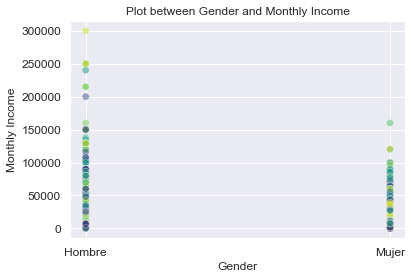

In [82]:
# Correlation between gender and Income
n = 180370
colors = np.random.rand(n) 
sns.scatterplot(x='Gender', y='Monthly Income', data=new_employed, cmap='viridis', c= colors, s=50, alpha=0.5, edgecolors='black')
# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Monthly Income')
plt.title('Plot between Gender and Monthly Income')
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# Show the plot
plt.show()

#plt.savefig("plot-gender-incomes.jpg")

# Next Steps

After looking at our results the next steps will be to try to achieve more accuracy and granularity. 3 levels of income seems not enough due to the distribution of our data. However it seems that our features are not helping us to gain more accuracy, meaning that:  

1.- We can try adding new features.  
2.- Redesign our categories.  
3.- Keep with optimization.  
3.- Try other models.  


Also, as we saw at the end of our model exploration, gender is a feature that seems to have a main importance at our model, we could keep exploring it and even create a logistic regression model to predict gender based on incomes and other features. 

# Thank you! 